In [1]:
import pandas as pd

In [5]:
from sklearn.pipeline import Pipeline

In [214]:
%config InlineBackend.figure_format = 'svg'

In [240]:
df = pd.read_csv('https://github.com/Anna-Pinewood/future_design_hackaton_4/blob/main/data/processed_data/df_daily_productivity.csv', encoding='utf-8')

ParserError: ignored

In [322]:
df.head()

,Тип,Продолжительность,Начало,Конец,Комментарий
0,Events,00:17,2022-05-20 17:13,2022-05-20 17:31,NaN
1,Социализация,00:40,2022-05-20 16:32,2022-05-20 17:13,NaN
2,Социализация,00:16,2022-05-20 16:16,2022-05-20 16:32,NaN
3,Учеба,00:41,2022-05-20 15:35,2022-05-20 16:16,NaN
4,Социализация,00:06,2022-05-20 15:28,2022-05-20 15:35,NaN


In [323]:
df2 = df

In [324]:
df2

,Тип,Продолжительность,Начало,Конец,Комментарий
0,Events,00:17,2022-05-20 17:13,2022-05-20 17:31,NaN
1,Социализация,00:40,2022-05-20 16:32,2022-05-20 17:13,NaN
2,Социализация,00:16,2022-05-20 16:16,2022-05-20 16:32,NaN
3,Учеба,00:41,2022-05-20 15:35,2022-05-20 16:16,NaN
4,Социализация,00:06,2022-05-20 15:28,2022-05-20 15:35,NaN
...,...,...,...,...,...
4988,Leisure,00:00,2021-10-25 08:39,2021-10-25 08:40,NaN
4989,Работа Maximum,00:04,2021-10-25 08:34,2021-10-25 08:39,Макс заполняла фвк по Крис
4990,Учеба,00:14,2021-10-25 08:19,2021-10-25 08:34,NaN
4991,Еда,00:18,2021-10-25 08:00,2021-10-25 08:18,NaN


In [325]:
df2.shape

(4993, 5)

In [326]:
df2 = df2.rename(columns={'Тип': 'act', 'Продолжительность': 'dur', 'Начало': 'begin', 'Конец': 'end', 'Комментарий': 'comment'})
df2.drop('comment', axis=1, inplace=True)

In [327]:
df2

,act,dur,begin,end
0,Events,00:17,2022-05-20 17:13,2022-05-20 17:31
1,Социализация,00:40,2022-05-20 16:32,2022-05-20 17:13
2,Социализация,00:16,2022-05-20 16:16,2022-05-20 16:32
3,Учеба,00:41,2022-05-20 15:35,2022-05-20 16:16
4,Социализация,00:06,2022-05-20 15:28,2022-05-20 15:35
...,...,...,...,...
4988,Leisure,00:00,2021-10-25 08:39,2021-10-25 08:40
4989,Работа Maximum,00:04,2021-10-25 08:34,2021-10-25 08:39
4990,Учеба,00:14,2021-10-25 08:19,2021-10-25 08:34
4991,Еда,00:18,2021-10-25 08:00,2021-10-25 08:18


In [328]:
idx = df2[df2.end.isnull()].index

In [329]:
df2.act.nunique()

21

In [330]:
df2_act_mappings = {'Events': 'socio',
                    'Социализация': 'socio',
                    'Учеба': 'study',
                    'Еда': 'eat',
                    'Пары': 'school',
                    'Транспорт': 'transport',
                    'Сборы...': 'transport',
                    'Душ. Beauty': 'chores',
                    'Планирование': 'study',
                    'Рома': 'socio',
                    'Leisure': 'leisure',
                    'Хобби / Осознанность': 'hobby',
                    'Магазин': 'chores',
                    'PwC': 'work',
                    'Спорт': 'sport',
                    'Работа Maximum': 'work',
                    'Вынужденное (больница)': 'leisure',
                    'Сон': 'sleep',
                    'Мафия': 'hobby',
                    'Уборка / Дом': 'chores',
                    'Учёба. Пары': 'study'}
df2['act'] = df2.act.replace(df2_act_mappings)

In [331]:
df2['isprod'] = df2.act.map(dict(zip(df2.act.unique().tolist(), [0,
1,
2,
1,
2,
2,
0,
1,
1,
1,
0]))).astype('category')

In [336]:
dict(zip(df2.act.unique().tolist(), [0,
1,
0,
1,
0,
0,
0,
1,
1,
0,
1,
1]))

{'chores': 0,
 'eat': 0,
 'hobby': 1,
 'leisure': 0,
 'school': 1,
 'sleep': 1,
 'socio': 0,
 'sport': 0,
 'study': 1,
 'transport': 0,
 'work': 1}

In [226]:
df2.act.unique()

array(['Events', 'Социализация', 'Учеба', 'Еда', 'Пары', 'Транспорт',
       'Сборы...', 'Душ. Beauty', 'Планирование', 'Рома', 'Leisure',
       'Хобби / Осознанность', 'Магазин', 'PwC', 'Спорт',
       'Работа Maximum', 'Вынужденное (больница)', 'Сон', 'Мафия',
       'Уборка / Дом', 'Учёба. Пары'], dtype=object)

In [334]:
df2['isfull'] = df2.act.map(dict(zip(df2.act.unique().tolist(), [0,
1,
0,
1,
0,
0,
0,
1,
1,
0,
1,
1]))).astype('category')

In [228]:
df2['begin'] = pd.to_datetime(df2.begin)
df2['end'] = pd.to_datetime(df2.end)

In [229]:
df2['dur'] = df2['dur'] + ':00'

In [230]:
df2['dur'] = pd.to_timedelta(df2.dur)

In [231]:
df2['date'] = df2.begin.dt.date

In [232]:
df2['dur'] = df2['dur'] - pd.to_timedelta(df2['dur'].dt.days, unit='d')

In [233]:
df2_by_days = df2.groupby(['date', 'act']).sum().reset_index('act')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


In [234]:
df2_by_days['isfull'] = df2_by_days.act.map(dict(zip(df2.act.unique().tolist(), [0,
1,
0,
1,
0,
0,
0,
1,
1,
0,
1,
1]))).astype('category')

In [235]:
df2_by_days['isprod'] = df2_by_days.act.map(dict(zip(df2.act.unique().tolist(), [0,
1,
2,
1,
2,
2,
0,
1,
1,
1,
0]))).astype('category')

In [184]:
df2_by_days

,act,dur,isfull,isprod
date,,,,
2021-10-25,eat,0 days 01:12:00,0,2
2021-10-25,hobby,0 days 01:38:00,1,1
2021-10-25,leisure,0 days 01:12:00,0,0
2021-10-25,school,0 days 02:36:00,1,1
2021-10-25,sport,0 days 01:44:00,0,1
...,...,...,...,...
2022-05-20,eat,0 days 00:26:00,0,2
2022-05-20,school,0 days 02:29:00,1,1
2022-05-20,socio,0 days 01:19:00,0,0


In [185]:
df2_by_days['minutes'] = df2_by_days.dur.dt.total_seconds()/60

In [194]:
df2_by_days

,act,dur,isfull,isprod,minutes
date,,,,,
2021-10-25,eat,0 days 01:12:00,0,2,72.0
2021-10-25,hobby,0 days 01:38:00,1,1,98.0
2021-10-25,leisure,0 days 01:12:00,0,0,72.0
2021-10-25,school,0 days 02:36:00,1,1,156.0
2021-10-25,sport,0 days 01:44:00,0,1,104.0
...,...,...,...,...,...
2022-05-20,eat,0 days 00:26:00,0,2,26.0
2022-05-20,school,0 days 02:29:00,1,1,149.0
2022-05-20,socio,0 days 01:19:00,0,0,79.0


In [187]:
df2_full = df2_by_days.groupby(['date','isfull']).sum().reset_index('isfull')

In [188]:
df2_full

,isfull,minutes
date,,
2021-10-25,0,473.0
2021-10-25,1,436.0
2021-10-26,0,766.0
2021-10-26,1,118.0
2021-10-27,0,462.0
...,...,...
2022-05-18,1,498.0
2022-05-19,0,572.0
2022-05-19,1,316.0


In [189]:
df2

,act,dur,begin,end,isprod,isfull,date
0,socio,0 days 00:17:00,2022-05-20 17:13:00,2022-05-20 17:13:00,0,0,2022-05-20
1,socio,0 days 00:40:00,2022-05-20 16:32:00,2022-05-20 16:32:00,0,0,2022-05-20
2,socio,0 days 00:16:00,2022-05-20 16:16:00,2022-05-20 16:16:00,0,0,2022-05-20
3,study,0 days 00:41:00,2022-05-20 15:35:00,2022-05-20 15:35:00,1,1,2022-05-20
4,socio,0 days 00:06:00,2022-05-20 15:28:00,2022-05-20 15:28:00,0,0,2022-05-20
...,...,...,...,...,...,...,...
4988,leisure,0 days 00:00:00,2021-10-25 08:39:00,2021-10-25 08:39:00,0,0,2021-10-25
4989,work,0 days 00:04:00,2021-10-25 08:34:00,2021-10-25 08:34:00,1,1,2021-10-25
4990,study,0 days 00:14:00,2021-10-25 08:19:00,2021-10-25 08:19:00,1,1,2021-10-25
4991,eat,0 days 00:18:00,2021-10-25 08:00:00,2021-10-25 08:00:00,2,0,2021-10-25


In [190]:
df2_prod =  df2_by_days.groupby(['date','isprod']).sum().reset_index('isprod')

In [191]:
df2_prod

,isprod,minutes
date,,
2021-10-25,0,72.0
2021-10-25,1,540.0
2021-10-25,2,297.0
2021-10-26,0,420.0
2021-10-26,1,202.0
...,...,...
2022-05-19,1,389.0
2022-05-19,2,219.0
2022-05-20,0,79.0


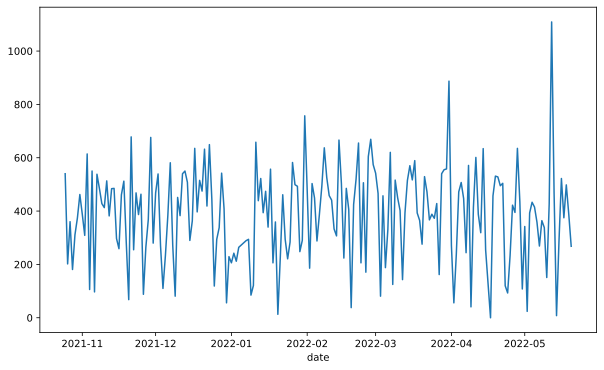

In [216]:
df2_prod[df2_prod.isprod==1].minutes.plot(figsize=(10,6))

In [236]:
df2_h = df2

In [237]:
df2_h.index =df2_h. date

In [238]:
df2_h = df2_h.loc[:,['begin', 'end', 'isprod']]

In [239]:
df2_h

,begin,end,isprod
date,,,
2022-05-20,2022-05-20 17:13:00,2022-05-20 17:31:00,0.0
2022-05-20,2022-05-20 16:32:00,2022-05-20 17:13:00,1.0
2022-05-20,2022-05-20 16:16:00,2022-05-20 16:32:00,1.0
2022-05-20,2022-05-20 15:35:00,2022-05-20 16:16:00,2.0
2022-05-20,2022-05-20 15:28:00,2022-05-20 15:35:00,1.0
...,...,...,...
2021-10-25,2021-10-25 08:39:00,2021-10-25 08:40:00,0.0
2021-10-25,2021-10-25 08:34:00,2021-10-25 08:39:00,NaN
2021-10-25,2021-10-25 08:19:00,2021-10-25 08:34:00,2.0


In [206]:
df2.to_csv('/content/drive')

,act,dur,begin,end,isprod,isfull,date
date,,,,,,,
2022-05-20,socio,0 days 00:17:00,2022-05-20 17:13:00,2022-05-20 17:13:00,0,0,2022-05-20
2022-05-20,socio,0 days 00:40:00,2022-05-20 16:32:00,2022-05-20 16:32:00,0,0,2022-05-20
2022-05-20,socio,0 days 00:16:00,2022-05-20 16:16:00,2022-05-20 16:16:00,0,0,2022-05-20
2022-05-20,study,0 days 00:41:00,2022-05-20 15:35:00,2022-05-20 15:35:00,1,1,2022-05-20
2022-05-20,socio,0 days 00:06:00,2022-05-20 15:28:00,2022-05-20 15:28:00,0,0,2022-05-20
...,...,...,...,...,...,...,...
2021-10-25,leisure,0 days 00:00:00,2021-10-25 08:39:00,2021-10-25 08:39:00,0,0,2021-10-25
2021-10-25,work,0 days 00:04:00,2021-10-25 08:34:00,2021-10-25 08:34:00,1,1,2021-10-25
2021-10-25,study,0 days 00:14:00,2021-10-25 08:19:00,2021-10-25 08:19:00,1,1,2021-10-25


In [256]:
kristina = pd.read_csv('/content/df_daily_productivity.csv')
kristina.index = pd.to_datetime(kristina.date)

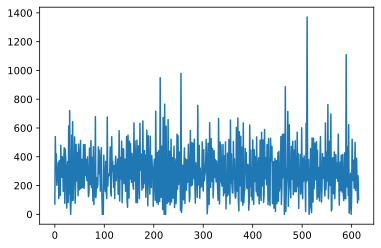

In [244]:
kristina.minutes.plot()

In [254]:
kristina

,date,isprod,minutes
0,2021-10-25,0,72.0
1,2021-10-25,1,540.0
2,2021-10-25,2,297.0
3,2021-10-26,0,420.0
4,2021-10-26,1,202.0
...,...,...,...
610,2022-05-19,1,389.0
611,2022-05-19,2,219.0
612,2022-05-20,0,79.0
613,2022-05-20,1,268.0


In [262]:
series.values

array([ 540.,  202.,  360.,  181.,  311.,  374.,  462.,  388.,  309.,
        614.,  106.,  550.,   97.,  538.,  485.,  428.,  413.,  513.,
        382.,  484.,  485.,  297.,  259.,  461.,  512.,  280.,   68.,
        678.,  255.,  468.,  387.,  463.,   88.,  264.,  368.,  676.,
        280.,  468.,  539.,  271.,  110.,  233.,  384.,  581.,  272.,
         81.,  451.,  383.,  540.,  550.,  508.,  290.,  363.,  635.,
        397.,  515.,  475.,  632.,  419.,  649.,  443.,  119.,  294.,
        338.,  542.,  408.,   56.,  229.,  206.,  242.,  212.,  264.,
        289.,  294.,   85.,  121.,  658.,  439.,  522.,  394.,  474.,
        340.,  557.,  206.,  359.,   13.,  226.,  461.,  294.,  221.,
        284.,  582.,  499.,  493.,  248.,  290.,  757.,  479.,  186.,
        503.,  449.,  288.,  388.,  494.,  637.,  526.,  458.,  441.,
        333.,  307.,  666.,  503.,  224.,  485.,  406.,   38.,  425.,
        520.,  655.,  206.,  506.,  171.,  604.,  669.,  574.,  542.,
        466.,   81.,

In [270]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = kristina[kristina.isprod==1].minutes
result = seasonal_decompose(series, model='additive', freq=int(len(series)/30))


In [279]:
data_kristina = result.trend.dropna()

In [298]:
for i in data_kristina.index[::20]:
  print(f'{str(i).split(" ")[0].split},')

2021-10-28,
2021-11-17,
2021-12-07,
2021-12-27,
2022-01-18,
2022-02-07,
2022-02-27,
2022-03-19,
2022-04-08,
2022-04-29,


In [286]:
data_kristina.index

DatetimeIndex(['2021-10-28', '2021-10-29', '2021-10-30', '2021-10-31',
               '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
               '2021-11-05', '2021-11-06',
               ...
               '2022-05-08', '2022-05-09', '2022-05-10', '2022-05-11',
               '2022-05-12', '2022-05-13', '2022-05-14', '2022-05-15',
               '2022-05-16', '2022-05-17'],
              dtype='datetime64[ns]', name='date', length=199, freq=None)

In [290]:
np.save(arr=data_kristina.index, file='/content/x.txt')

In [287]:
np.set_printoptions(threshold=sys.maxsize, file='/content/x')


TypeError: ignored

In [282]:
import numpy as np

In [284]:
import sys

In [ ]:
np.sav

# Генерация временных рядов

In [ ]:
# прокрастинация: 0-3
# отметьте вед виды деятельности - учёба / работа / 
# во сколько вы ложитесь в будние
# в выходные
# 8 часов 
# часто ли вы чувствуете себя несчастным 0-3
# как долго вы восстанавливаетесь после выгорания? 1-14 days

In [ ]:
# Оцените свою проркастиницаю по шкале от 0 до 3 где 0 - почти не прокрастинирую, а 3 - постоянно прокрастинирую
# В чекбоках отметьте учитесь / работаете
# Диапазон в который вы обычно ложитесь в будние дни # сон дефолт 8.5
# Диапазон в который вы обычно ложитесь в выходные дни
# Чувствуете ли вы себя нестчастным обычно? 0-3

In [ ]:
# 1. Расписание на день будний + шум + 'бродячие данные'
# 2. Расписание на день выходной + шум
# 3. Добавление выгораний

In [ ]:
d = pd.Timestamp('when_sleep_bud').time()
d += pd.to_timedelta(8.5, unit='h')

In [ ]:
def make_standard_weekday(date: str, # 2022-06-22 
                          sleep_time: str):
  day_sleep_time = date + ' ' + sleep_time
  day_sleep_time = pd.Timestamp('when_sleep_bud').time()
  day_wake_time = sleep_time + pd.to_timedelta(8.5, unit='h')

  standard_weekday_school = pd.DataFrame({
      'begin': [wake_time for  pd.to_timedelta(8.5, unit='i' ]
  })

In [477]:
def generate_weekday(when_sleep_bud: str,
                     work: int,
                     school: int):
  day_schedule = pd.DataFrame([])
  sleep_time = pd.Timestamp('when_sleep_bud').time()
  wake_time = sleep_time + pd.to_timedelta(8.5, unit='h')
  if school:
    


In [482]:
d = pd.Timestamp('18:00:00')
d += pd.to_timedelta(8.5, unit='h')

In [489]:
str(d)

'2022-05-22 02:30:00'

# Первичная обработка данных

In [307]:
from typing import Dict

## default data

In [302]:
act_mappings = {'Events': 'socio',
                'Социализация': 'socio',
                    'Учеба': 'study',
                    'Еда': 'eat',
                    'Пары': 'school',
                    'Транспорт': 'transport',
                    'Сборы...': 'transport',
                    'Душ. Beauty': 'chores',
                    'Планирование': 'study',
                    'Рома': 'socio',
                    'Leisure': 'leisure',
                    'Хобби / Осознанность': 'hobby',
                    'Магазин': 'chores',
                    'PwC': 'work',
                    'Спорт': 'sport',
                    'Работа Maximum': 'work',
                    'Вынужденное (больница)': 'leisure',
                    'Сон': 'sleep',
                    'Мафия': 'hobby',
                    'Уборка / Дом': 'chores',
                    'Учёба. Пары': 'study'}

In [337]:
mappings_prod_custom = {'chores': 2,
 'eat': 2,
 'hobby': 1,
 'leisure': 0,
 'school': 1,
 'sleep': 0,
 'socio': 0,
 'sport': 1,
 'study': 1,
 'transport': 2,
 'work': 1}
mappings_full_custom = {'chores': 0,
 'eat': 0,
 'hobby': 1,
 'leisure': 0,
 'school': 1,
 'sleep': 1,
 'socio': 0,
 'sport': 0,
 'study': 1,
 'transport': 0,
 'work': 1}

## обработка

In [464]:
train = df.iloc[:round(df.shape[0])]
test = df.iloc[:round(df.shape[0])]

In [468]:
def naming_and_types(data: pd.DataFrame) -> pd.DataFrame:
  data = data.rename(columns={'Тип': 'act', 'Продолжительность': 'dur', 'Начало': 'begin', 'Конец': 'end', 'Комментарий': 'comment'})
  data = data.drop('comment', axis=1)

  data['act'] = data.act.replace(act_mappings)

  data['begin'] = pd.to_datetime(data.begin)
  data['end'] = pd.to_datetime(data.end)

  data['dur'] = data['dur'] + ':00'
  data['dur'] = pd.to_timedelta(data.dur)
  data['dur'] = data['dur'] - pd.to_timedelta(data['dur'].dt.days, unit='d')

  data['minutes'] = data.dur.dt.total_seconds()/60
  data['date'] = data.begin.dt.date


  data = data.drop('dur', axis=1)

  return data

def prod_fullfil_columns(data: pd.DataFrame,
                         mappings_prod: Dict[str, int],
                         mappings_full: Dict[str, int]) \
                         -> pd.DataFrame:
    data['isprod'] = data.act.map(mappings_prod).astype('category')
    data['isfull'] = data.act.map(mappings_full).astype('category')
    return data

def base_pipeline(data: pd.DataFrame,
                         mappings_prod: Dict[str, int] = mappings_prod_custom,
                         mappings_full: Dict[str, int] = mappings_full_custom) \
                         -> pd.DataFrame:
  data = naming_and_types(data)
  data = prod_fullfil_columns(data, mappings_prod, mappings_full)
  return data

In [487]:
naming_and_types(df)

,act,begin,end,minutes,date
0,socio,2022-05-20 17:13:00,2022-05-20 17:31:00,17.0,2022-05-20
1,socio,2022-05-20 16:32:00,2022-05-20 17:13:00,40.0,2022-05-20
2,socio,2022-05-20 16:16:00,2022-05-20 16:32:00,16.0,2022-05-20
3,study,2022-05-20 15:35:00,2022-05-20 16:16:00,41.0,2022-05-20
4,socio,2022-05-20 15:28:00,2022-05-20 15:35:00,6.0,2022-05-20
...,...,...,...,...,...
4988,leisure,2021-10-25 08:39:00,2021-10-25 08:40:00,0.0,2021-10-25
4989,work,2021-10-25 08:34:00,2021-10-25 08:39:00,4.0,2021-10-25
4990,study,2021-10-25 08:19:00,2021-10-25 08:34:00,14.0,2021-10-25
4991,eat,2021-10-25 08:00:00,2021-10-25 08:18:00,18.0,2021-10-25


In [422]:
def sleep_for_outliers(data: pd.DataFrame):
  data = data.groupby('date').sum()
  data['sleep'] = 24*60 - data.minutes
  return pd.DataFrame(data['sleep'])

In [417]:
def get_prod(data: pd.DataFrame):
  data = data.groupby(['date', 'isprod']).sum()['minutes'].reset_index('isprod')
  return data

In [449]:
def get_outliers_data_productive(data: pd.DataFrame):
  return data[data.isprod==0]

In [450]:
def get_outliers_data_inprod(data: pd.DataFrame):
  return data[data.isprod==1]

In [455]:
def get_full(data: pd.DataFrame):
  data = data.groupby(['date', 'isfull']).sum()['minutes'].reset_index('isfull')
  return data

In [430]:
def get_outliers_data_fulfill(data: pd.DataFrame):
  return data[data.isfull==0]

In [431]:
def get_outliers_data_devast(data: pd.DataFrame):
  return data[data.isfull==1]

## демонстрация обработки

In [441]:
train

,Тип,Продолжительность,Начало,Конец,Комментарий
0,Events,00:17,2022-05-20 17:13,2022-05-20 17:31,NaN
1,Социализация,00:40,2022-05-20 16:32,2022-05-20 17:13,NaN
2,Социализация,00:16,2022-05-20 16:16,2022-05-20 16:32,NaN
3,Учеба,00:41,2022-05-20 15:35,2022-05-20 16:16,NaN
4,Социализация,00:06,2022-05-20 15:28,2022-05-20 15:35,NaN
...,...,...,...,...,...
4988,Leisure,00:00,2021-10-25 08:39,2021-10-25 08:40,NaN
4989,Работа Maximum,00:04,2021-10-25 08:34,2021-10-25 08:39,Макс заполняла фвк по Крис
4990,Учеба,00:14,2021-10-25 08:19,2021-10-25 08:34,NaN
4991,Еда,00:18,2021-10-25 08:00,2021-10-25 08:18,NaN


In [469]:
base_pipeline(train)

,act,begin,end,minutes,date,isprod,isfull
0,socio,2022-05-20 17:13:00,2022-05-20 17:31:00,17.0,2022-05-20,0,0
1,socio,2022-05-20 16:32:00,2022-05-20 17:13:00,40.0,2022-05-20,0,0
2,socio,2022-05-20 16:16:00,2022-05-20 16:32:00,16.0,2022-05-20,0,0
3,study,2022-05-20 15:35:00,2022-05-20 16:16:00,41.0,2022-05-20,1,1
4,socio,2022-05-20 15:28:00,2022-05-20 15:35:00,6.0,2022-05-20,0,0
...,...,...,...,...,...,...,...
4988,leisure,2021-10-25 08:39:00,2021-10-25 08:40:00,0.0,2021-10-25,0,0
4989,work,2021-10-25 08:34:00,2021-10-25 08:39:00,4.0,2021-10-25,1,1
4990,study,2021-10-25 08:19:00,2021-10-25 08:34:00,14.0,2021-10-25,1,1
4991,eat,2021-10-25 08:00:00,2021-10-25 08:18:00,18.0,2021-10-25,2,0


### функция для аутлайеров

In [ ]:
train = base_pipeline(train)

In [445]:
sleep_for_outliers(train)

,sleep
date,
2021-10-25,531.0
2021-10-26,556.0
2021-10-27,676.0
2021-10-28,755.0
2021-10-29,393.0
...,...
2022-05-16,561.0
2022-05-17,508.0
2022-05-18,506.0


In [446]:
prod_daily = get_prod(train)
prod_daily

,isprod,minutes
date,,
2021-10-25,0,72.0
2021-10-25,1,540.0
2021-10-25,2,297.0
2021-10-26,0,420.0
2021-10-26,1,202.0
...,...,...
2022-05-19,1,389.0
2022-05-19,2,219.0
2022-05-20,0,79.0


In [447]:
get_outliers_data_productive(prod_daily)

,isprod,minutes
date,,
2021-10-25,0,72.0
2021-10-26,0,420.0
2021-10-27,0,295.0
2021-10-28,0,373.0
2021-10-29,0,479.0
...,...,...
2022-05-16,0,122.0
2022-05-17,0,376.0
2022-05-18,0,271.0


In [451]:
get_outliers_data_inprod(prod_daily)

,isprod,minutes
date,,
2021-10-25,1,540.0
2021-10-26,1,202.0
2021-10-27,1,360.0
2021-10-28,1,181.0
2021-10-29,1,311.0
...,...,...
2022-05-16,1,522.0
2022-05-17,1,375.0
2022-05-18,1,498.0


In [457]:
full_data = get_full(train)
full_data

,isfull,minutes
date,,
2021-10-25,0,473.0
2021-10-25,1,436.0
2021-10-26,0,766.0
2021-10-26,1,118.0
2021-10-27,0,462.0
...,...,...
2022-05-18,1,498.0
2022-05-19,0,572.0
2022-05-19,1,316.0


In [459]:
get_outliers_data_fulfill(full_data)

,isfull,minutes
date,,
2021-10-25,0,473.0
2021-10-26,0,766.0
2021-10-27,0,462.0
2021-10-28,0,504.0
2021-10-29,0,736.0
...,...,...
2022-05-16,0,357.0
2022-05-17,0,557.0
2022-05-18,0,436.0


In [460]:
get_outliers_data_devast(full_data)

,isfull,minutes
date,,
2021-10-25,1,436.0
2021-10-26,1,118.0
2021-10-27,1,302.0
2021-10-28,1,181.0
2021-10-29,1,311.0
...,...,...
2022-05-16,1,522.0
2022-05-17,1,375.0
2022-05-18,1,498.0
